In [262]:
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib.dates  as mdates
import seaborn           as sns
import numpy             as np
from   matplotlib.patches import Patch

In [263]:
# load datasets
users = pd.read_csv("Polito_Debate_users.csv")
texts = pd.read_csv("Polito_Debate_texts.csv")

# remove all users which are bots
print(f"there are {len(users)} users (in total)")
users = users[users["bot"] == False]
print(f"there are {len(users)} users (humans)")

# remove all text which are empty
print(f"there are {len(texts)} messages in total")
texts = texts[texts["text"] != ""]

# join datasets, considering just relevant columns
records = pd.merge(texts, users, left_on="sender", right_on="id")
records = records[["sender", "username", "first_name", "last_name", "date", "text"]]

print(f"there are {len(records)} messages (considered human accounts)")

there are 333 users (in total)
there are 326 users (humans)
there are 229814 messages in total
there are 189086 messages (considered human accounts)


In [264]:
# convert date into pandas object
records["date"] = pd.to_datetime(records["date"])

# get date and time seperately
records["only_date"]    = records["date"].dt.date
records["only_time"]    = records["date"].dt.time
records["only_hour"]    = records["date"].dt.hour
records["day_of_week"]  = records["date"].dt.day_of_week

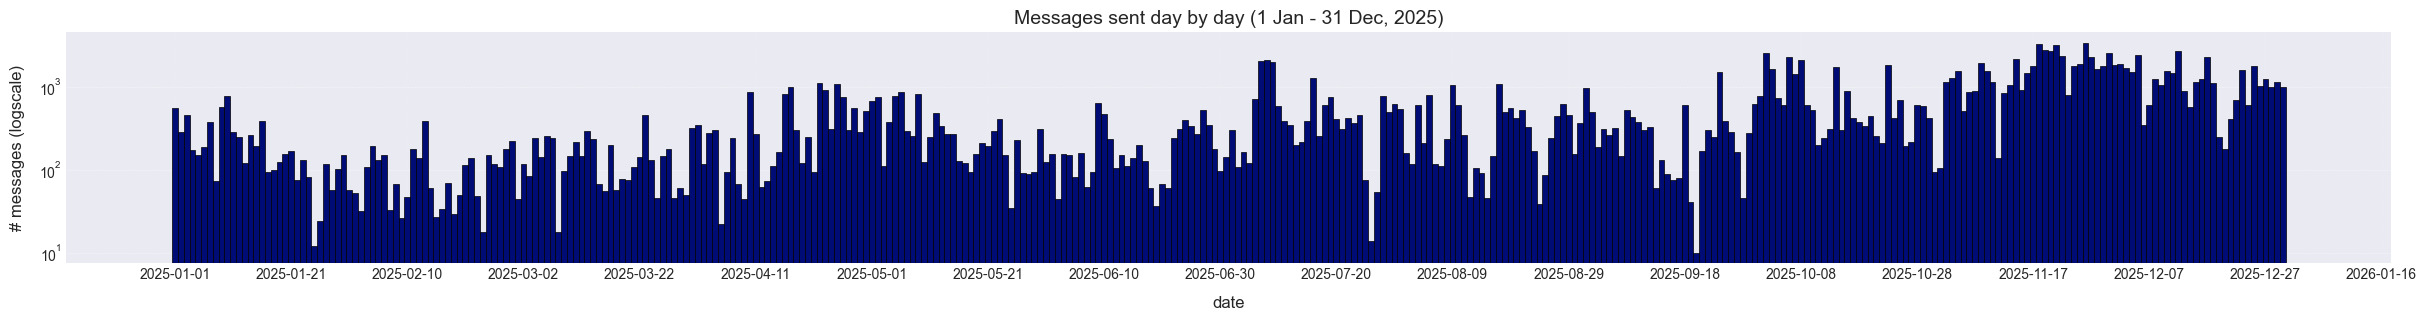

In [265]:
# group by records by date
data     = records.groupby("only_date").size()
x_values = data.index.tolist()
y_values = data.values.tolist()

# plot
fig, ax = plt.subplots(figsize=(30, 3))

# set locator and formatter
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

ax.set_title("Messages sent day by day (1 Jan - 31 Dec, 2025)", fontsize=14)
ax.set_xlabel("date",                  fontsize=12, labelpad=10)
ax.set_ylabel("# messages (logscale)", fontsize=12, labelpad=10)

# plot
ax.bar(x_values, y_values, color="#000C75", edgecolor="#000000", width=1.0)

ax.grid(axis="y", linestyle="--", linewidth=0.4, alpha=0.6)
ax.grid(axis="x", linestyle="--", linewidth=0.3, alpha=0.3)
ax.set_yscale("log")
plt.show()

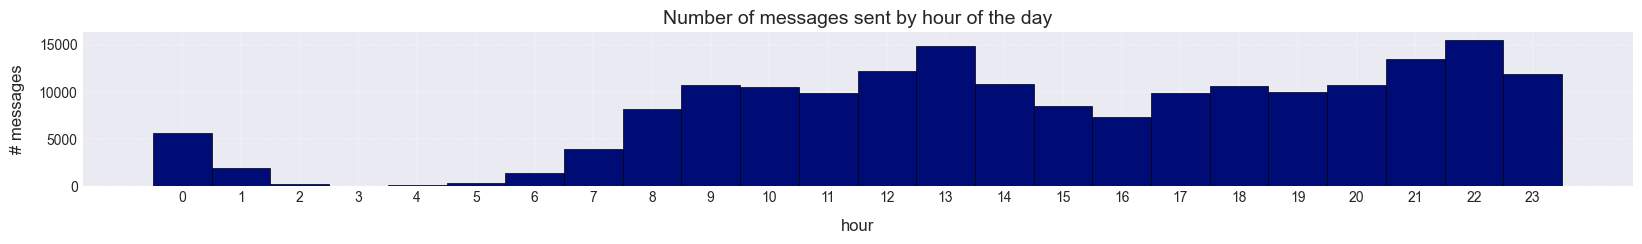

In [266]:
# group records by hour of the day
data     = records.groupby("only_hour").size()
x_values = data.index.tolist()
y_values = data.values.tolist()

# plot
fig, ax = plt.subplots(figsize=(20, 2))

ax.set_title("Number of messages sent by hour of the day", fontsize=14)
ax.set_xlabel("hour",       fontsize=12, labelpad=10)
ax.set_ylabel("# messages", fontsize=12, labelpad=10)

# plot
ax.set_xticks(range(0, 24))
ax.bar(x_values, y_values, color="#000C75", edgecolor="#000000", width=1.0)

plt.grid(axis="y", linewidth=0.3, linestyle="--")
plt.grid(axis="x", linewidth=0.3, linestyle="--")

plt.show()

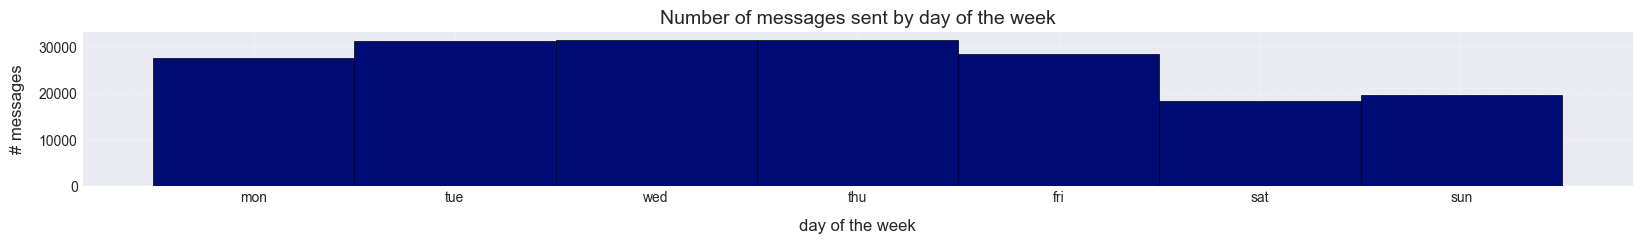

In [267]:
# group records by hour of the day
data     = records.groupby("day_of_week").size()
x_values = data.index.tolist()
y_values = data.values.tolist()

# plot
fig, ax = plt.subplots(figsize=(20, 2))

ax.set_title("Number of messages sent by day of the week", fontsize=14)
ax.set_xlabel("day of the week", fontsize=12, labelpad=10)
ax.set_ylabel("# messages",      fontsize=12, labelpad=10)

# plot
ax.set_xticks(range(0, 7), ["mon", "tue", "wed", "thu", "fri", "sat", "sun"])
ax.bar(x_values, y_values, color="#000C75", edgecolor="#000000", width=1.0)

plt.grid(axis="y", linewidth=0.3, linestyle="--")
plt.grid(axis="x", linewidth=0.3, linestyle="--")
plt.show()

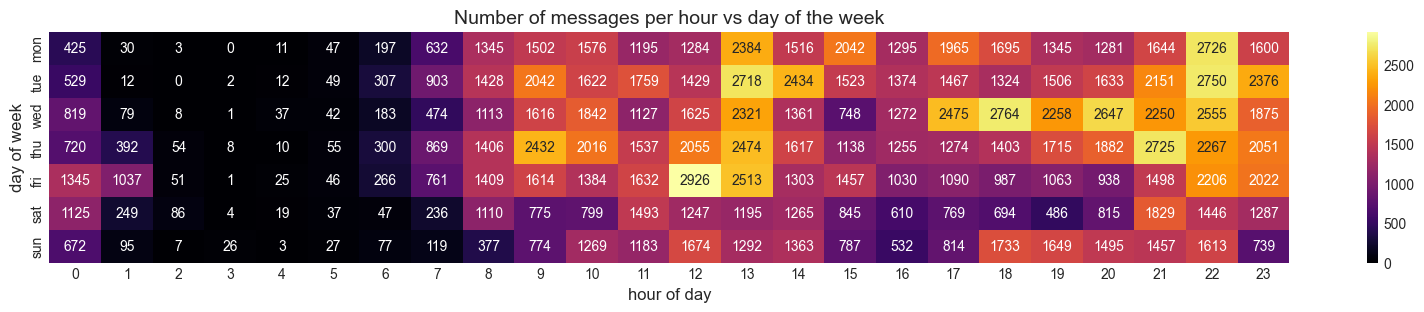

In [268]:
data = records.pivot_table(index='day_of_week', columns='only_hour', values='date', aggfunc='count').fillna(0)

# rename index
data.index = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]

# plot using seaborn
plt.figure(figsize=(20, 3))
sns.heatmap(data, cmap="inferno", annot=True, fmt='g')

plt.title("Number of messages per hour vs day of the week", fontsize=14)
plt.xlabel("hour of day", fontsize=12)
plt.ylabel("day of week", fontsize=12)

plt.show()

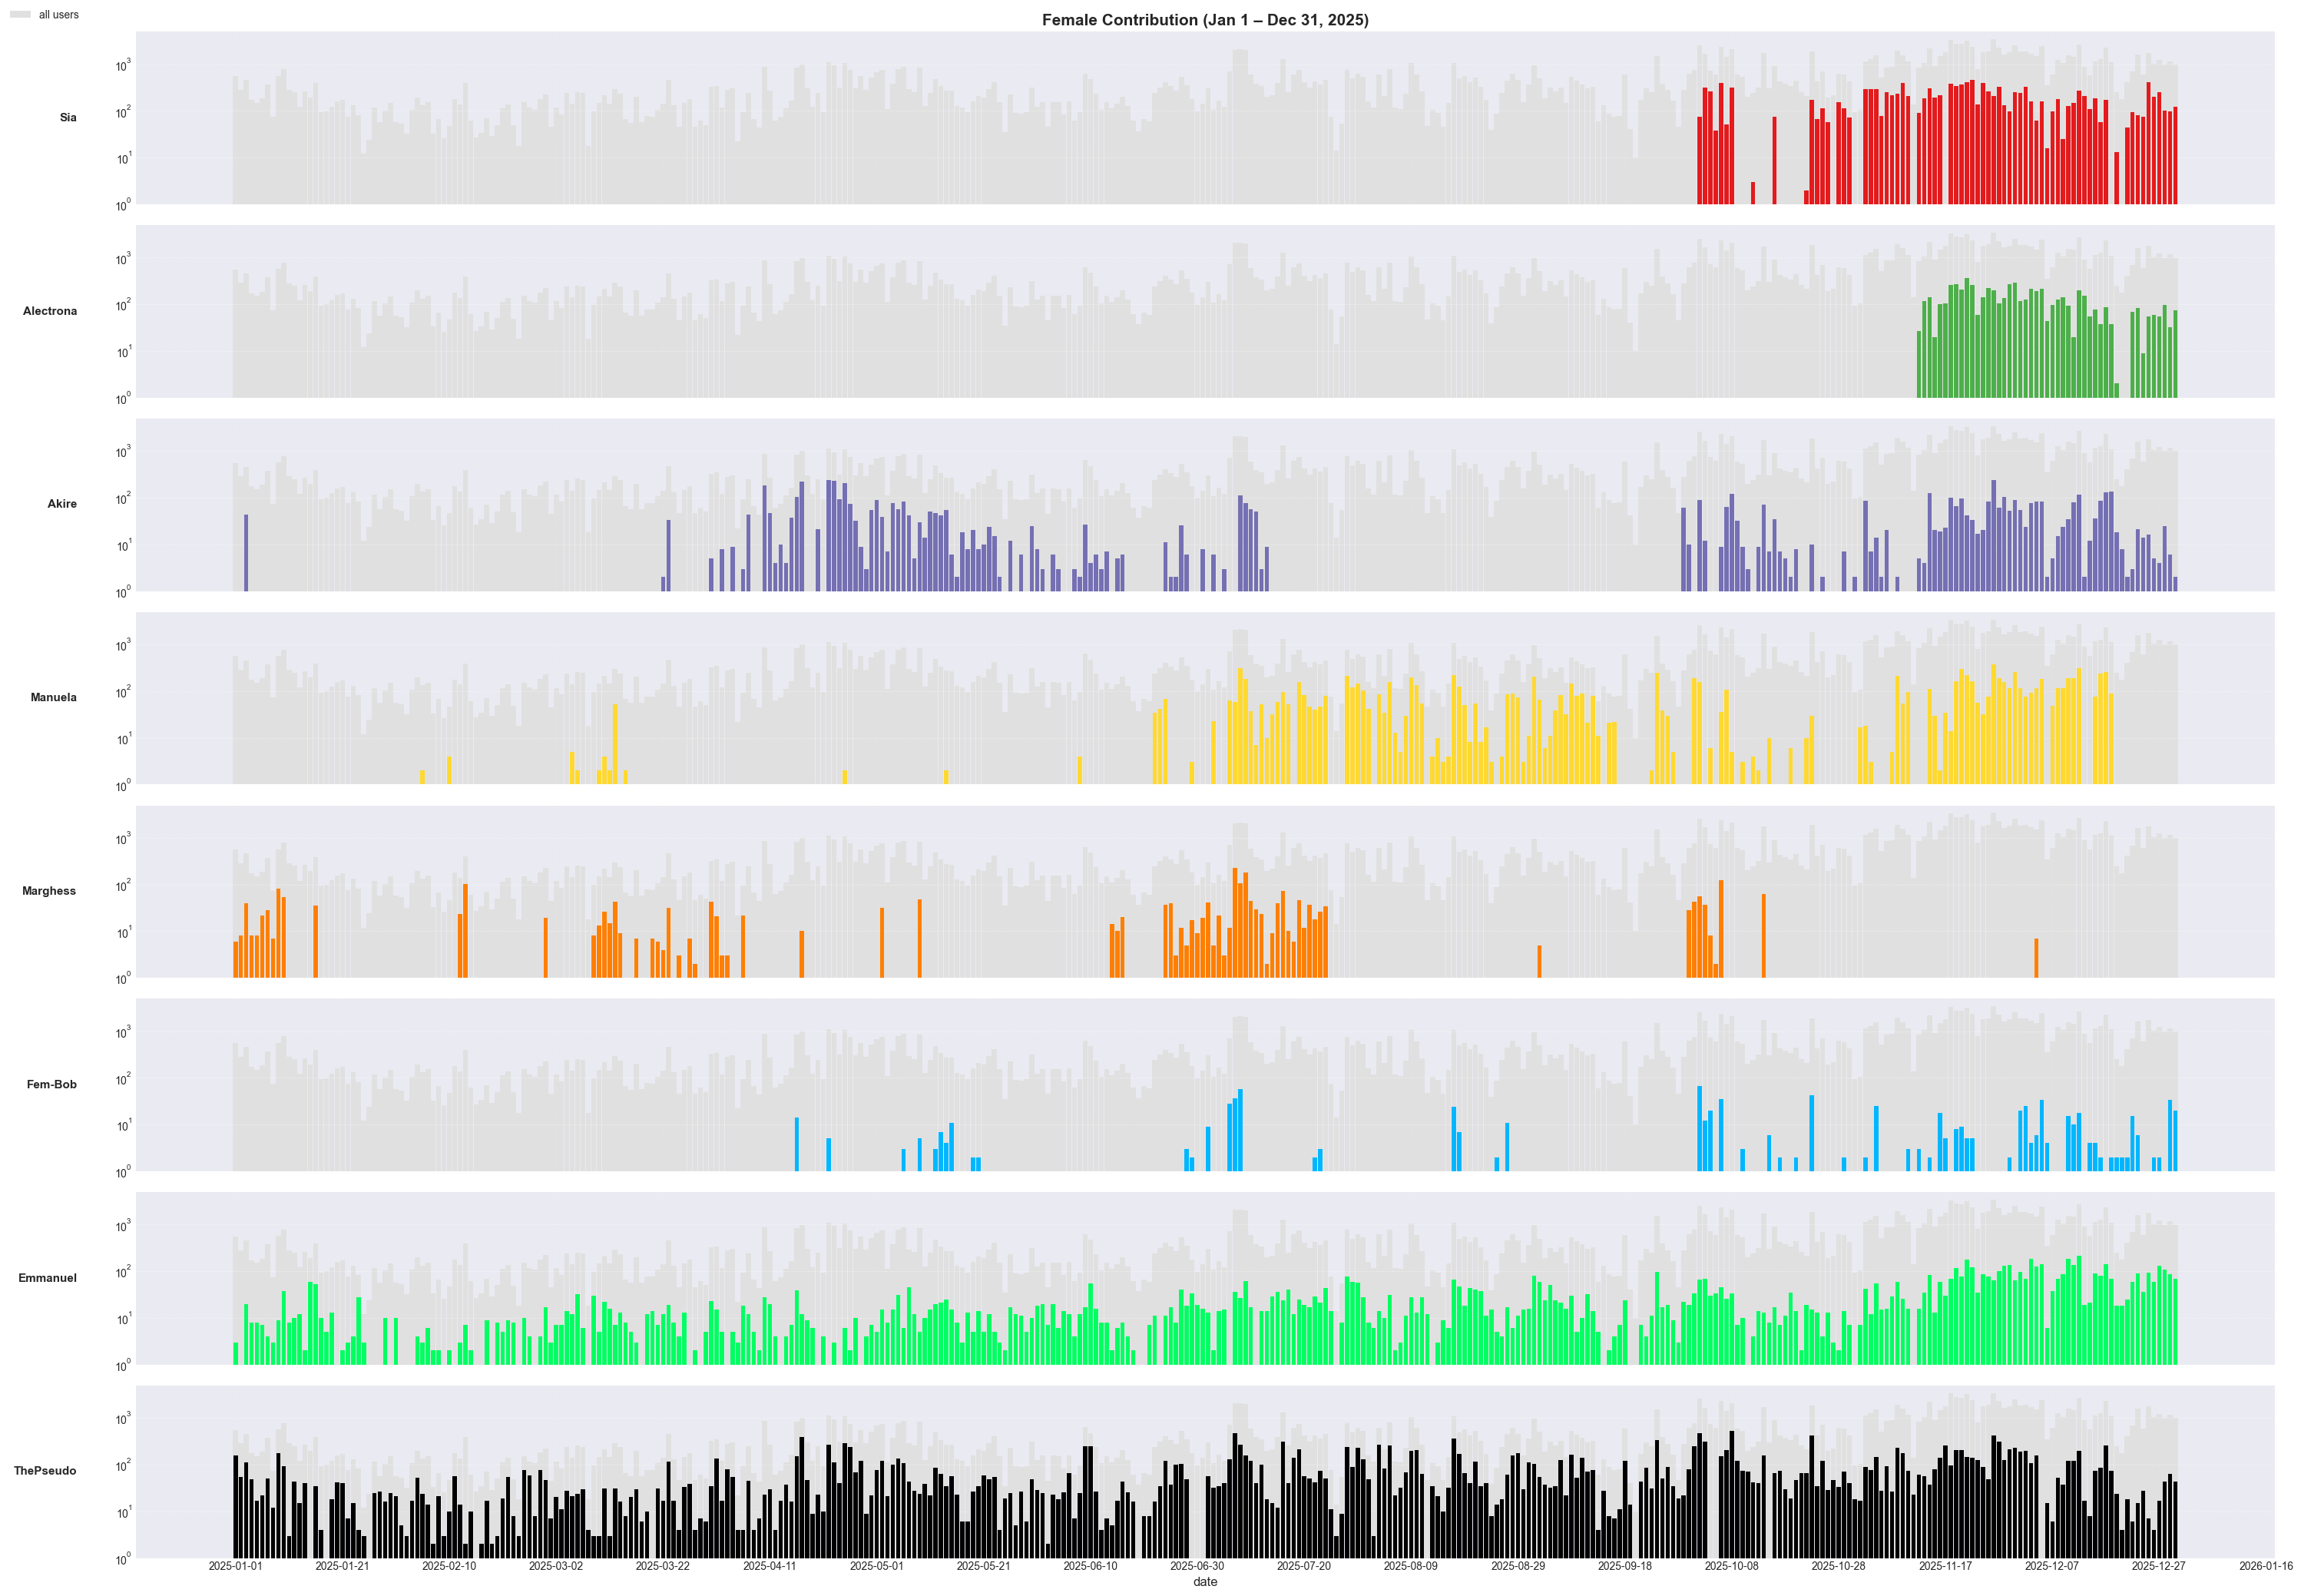

In [269]:
# user configuration
USERS = {
    "Sia":        {"id": 8352564180, "color": "#e41a1c"},
    "Alectrona":  {"id": 881851611,  "color": "#4daf4a"},
    "Akire":      {"id": 945507758,  "color": "#7570b3"},
    "Manuela":    {"id": 1351288125, "color": "#ffd92f"},
    "Marghess":   {"id": 747094211,  "color": "#ff7f00"},
    "Fem-Bob":    {"id": 1459705611, "color": "#00b7ff"},
    "Emmanuel":   {"id": 831843649, "color": "#00ff62"},
    "ThePseudo":  {"id": 183672862, "color": "#000000"}
}


total = records.groupby("only_date").size()

user_series = {}
for name, cfg in USERS.items():
    s = records[records["sender"] == cfg["id"]].groupby("only_date").size()
    user_series[name] = s

fig, axes = plt.subplots(len(USERS), 1, figsize=(30, 2.6 * len(USERS)), sharex=True, sharey=True)

for ax, (name, cfg) in zip(axes, USERS.items()):
    s = user_series[name]
    ax.bar(total.index, total.values, color="#e0e0e0", width=0.95, zorder=0)
    ax.bar(s.index, s.values, color=cfg["color"], width=0.8, zorder=3)
    ax.set_yscale("log")
    ax.set_ylim(bottom=1)
    ax.set_ylabel(name, rotation=0, ha="right", va="center", labelpad=35, fontsize=11, weight="bold")
    ax.grid(axis="y", linestyle="--", linewidth=0.4, alpha=0.6)
    ax.grid(axis="x", linestyle="--", linewidth=0.3, alpha=0.3)

axes[-1].xaxis.set_major_locator(mdates.DayLocator(interval=20))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
axes[-1].set_xlabel("date")
axes[0].set_title("Female Contribution (Jan 1 – Dec 31, 2025)", fontsize=15, weight="bold")

fig.align_ylabels(axes)
plt.tight_layout()

proxy = Patch(facecolor="#e0e0e0", edgecolor="none", label="all users")
fig.legend(handles=[proxy], loc="upper left", frameon=False)
plt.show()


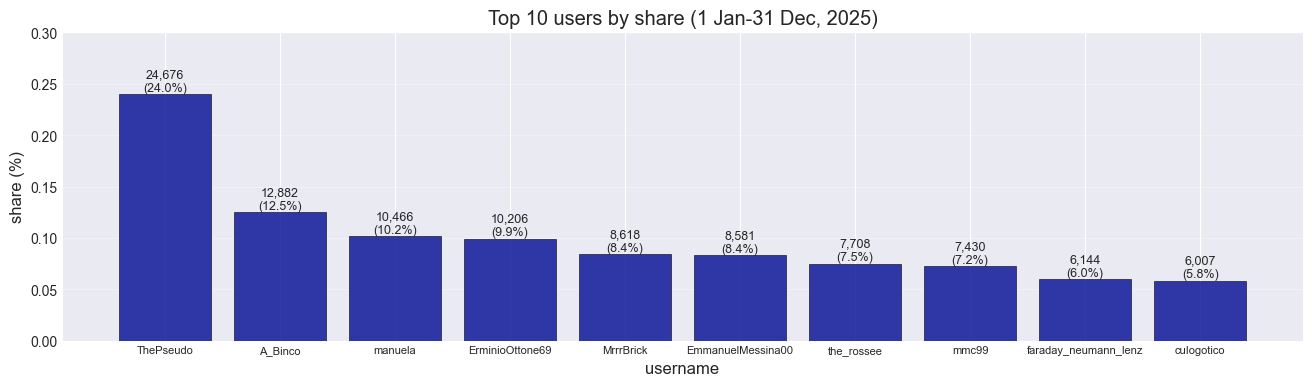

In [270]:
top_n = 10
top_users = records.groupby("username").size().sort_values(ascending=False).head(top_n)

msgs       = top_users.values
labels     = top_users.index.astype(str)
shares     = msgs / msgs.sum()

plt.figure(figsize=(16, 4))

# generate bars
bars = plt.bar(np.arange(top_n), shares, edgecolor="black", alpha=0.8, color="#000A94")

for i, (bar, m) in enumerate(zip(bars, msgs)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{m:,}\n({shares[i]*100:.1f}%)", ha="center", va="bottom", fontsize=9)

plt.xticks(np.arange(top_n), labels, rotation=0, ha="center", fontsize=8)
plt.xlabel("username")
plt.ylabel("share (%)")
plt.title(f"Top {top_n} users by share (1 Jan-31 Dec, 2025)")
plt.ylim(0, shares.max() * 1.25)
plt.grid(axis="y", alpha=0.3)
plt.show()